<a href="https://colab.research.google.com/github/wilmercin007/wilmercin007/blob/main/RED_NEURONAL_SUSCEPTIBILIDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODELO DE RED NEURONAL PARA EVALUACIÓN DE SUSCEPTIBILIDAD**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1100      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,401
Trainable params: 21,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 3s 106ms/step - loss: 0.8056 - val_loss: 0.2505
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 0.2726 - val

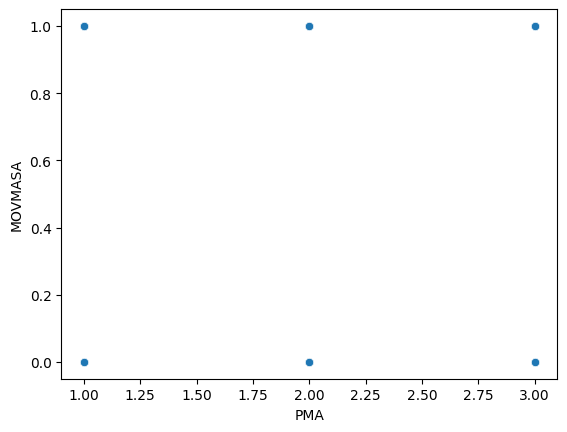

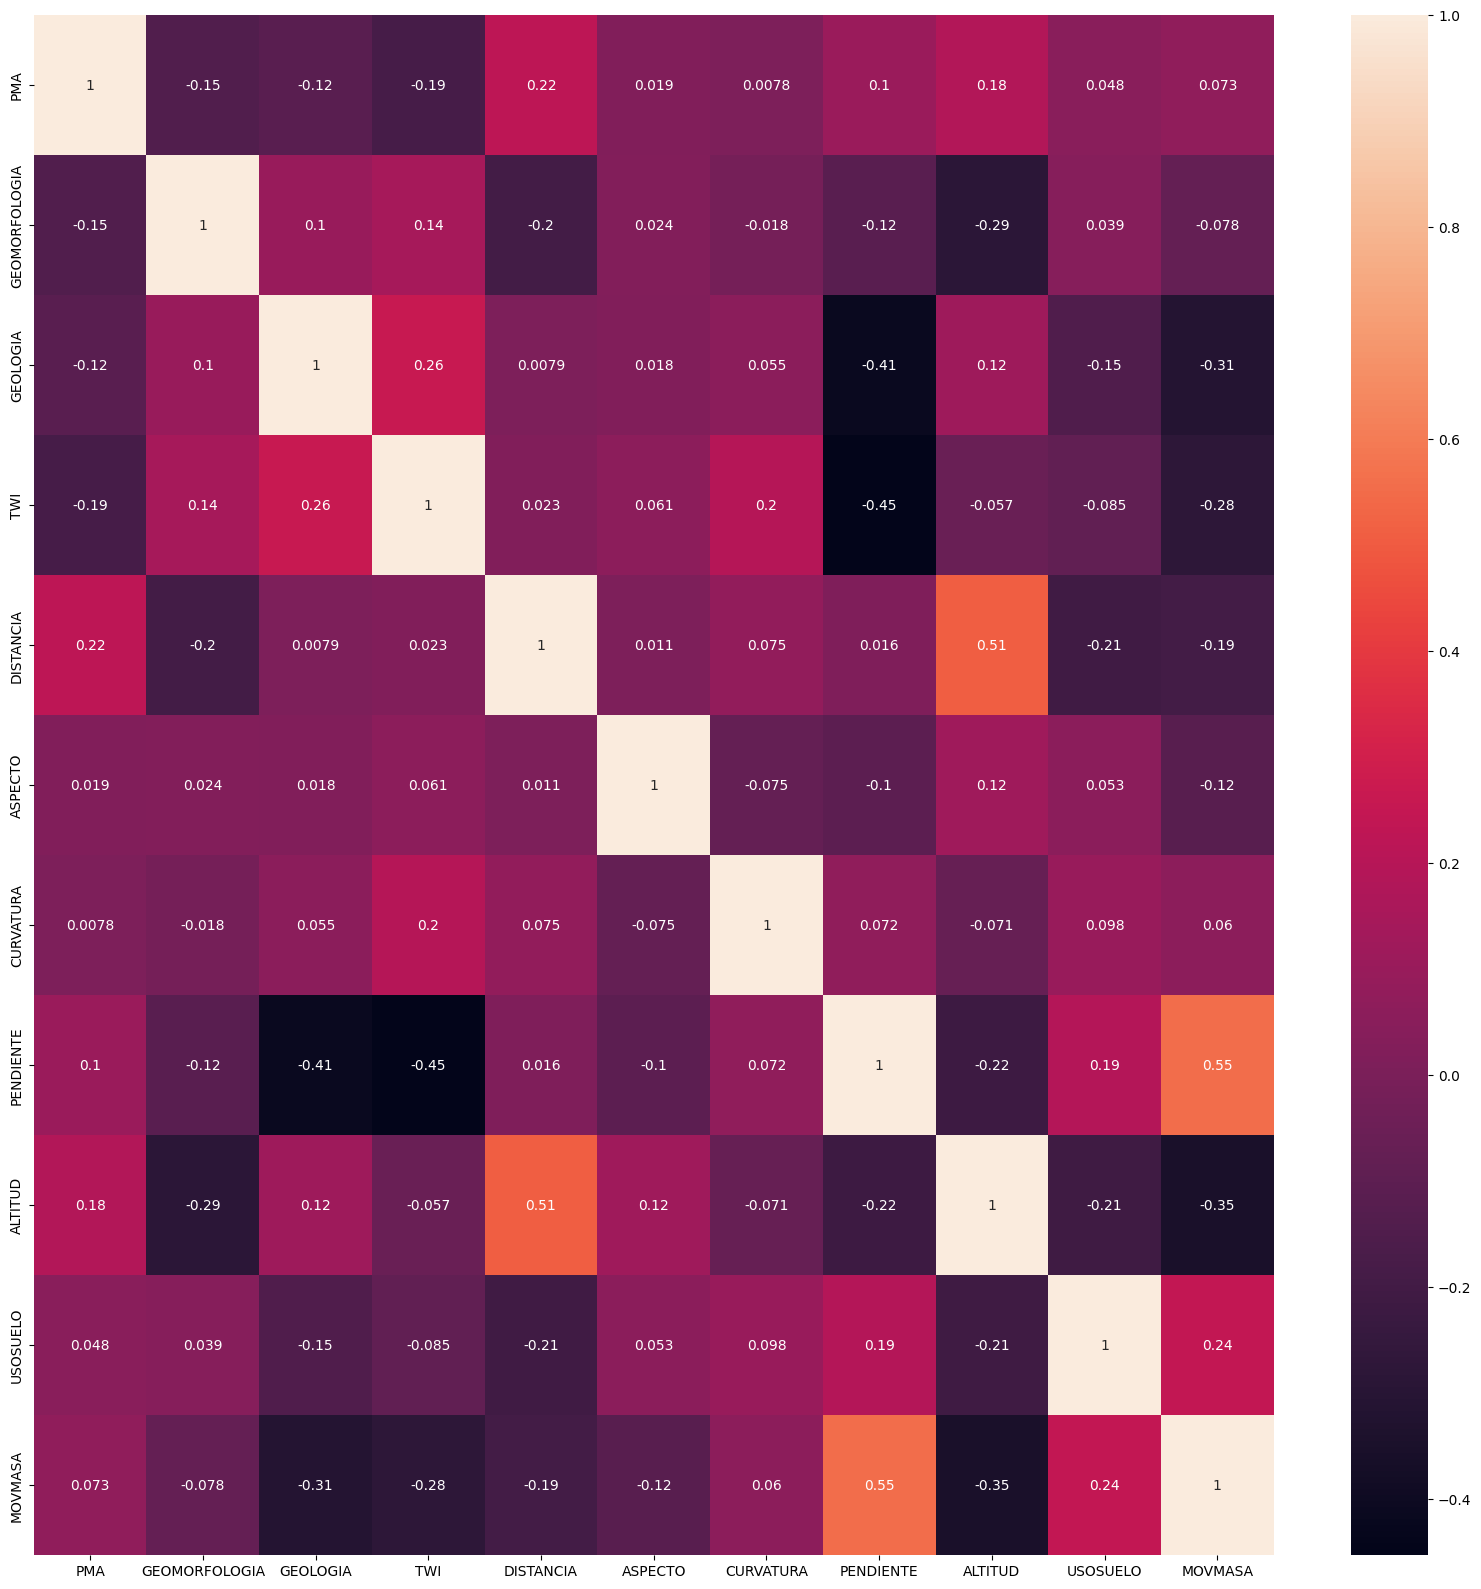

In [ ]:
from keras.utils import plot_model
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Importando Datos
MOVMASA_df = pd.read_csv("TRAINING.csv")

#VISUALIZACION
sns.scatterplot(x = 'PMA', y = 'MOVMASA', data = MOVMASA_df)

#correlacion
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(MOVMASA_df.corr(), annot = True)

##LIMPIEZA DE DATOS
selected_features = ['PMA', 'GEOMORFOLOGIA', 'GEOLOGIA', 'TWI', 'DISTANCIA', 'ASPECTO', 'CURVATURA', 'PENDIENTE', 'ALTITUD', 'USOSUELO']


X = MOVMASA_df[selected_features]
y = MOVMASA_df['MOVMASA']


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Normalizando output
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)


#ENTRENAMIENTO
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

##Definiendo modelo
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='sigmoid', input_shape=(10, )))
model.add(tf.keras.layers.Dense(units=100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.summary()


model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)


#Evaluando Modelo
epochs_hist.history.keys()


#Prediccion
#Definir Movimientos en Masa por predecir con sus respectivas entradas / inputs
# 'PMA','GEOMORFOLOGIA','GEOLOGIA','TWI','DISTANCIA', 'ASPECTO', 'CURVATURA', 'PENDIENTE', 'ALTITUD', 'USOSUELO'
X_test_1 = pd.read_csv("INPUT_ANN.csv")


scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

#Haciendo prediccion
y_predict_1 = model.predict(X_test_scaled_1)


#Revirtiendo Escalado para apreciar el precio correctamente escalado
y_predict_1 = scaler.inverse_transform(y_predict_1)
df = pd.DataFrame(y_predict_1)
df
from google.colab import files
df.to_excel("C:\\Users\\usuario\\Desktop\ANN_OUTPUT.xlsx")

In [ ]:
!pip install ann-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=8b6360ed0225c86e10f9cb3f136bb00444dbd1425fee774bfce592218729c5c8
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann-visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz
from graphviz import Source

In [ ]:
ann_viz(model, title='Iris Neural Network')

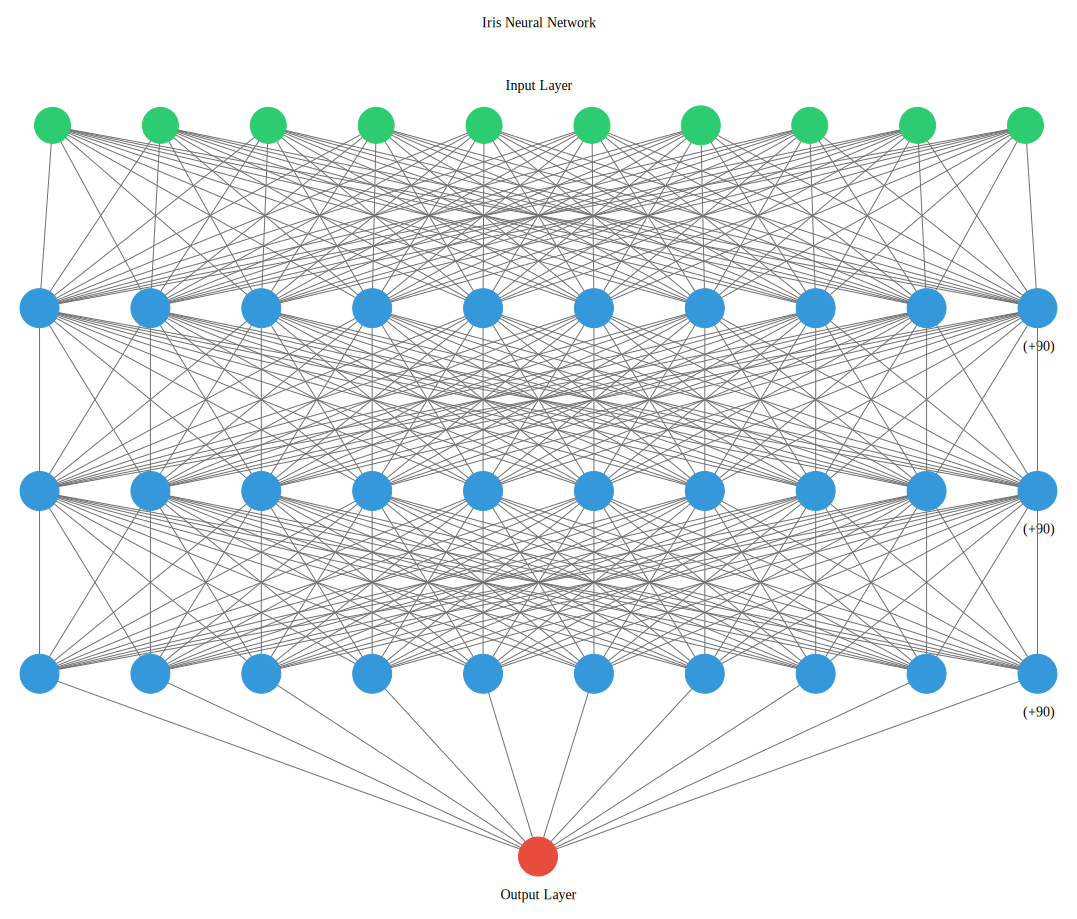

In [ ]:
graph_source = Source.from_file('network.gv')
graph_source

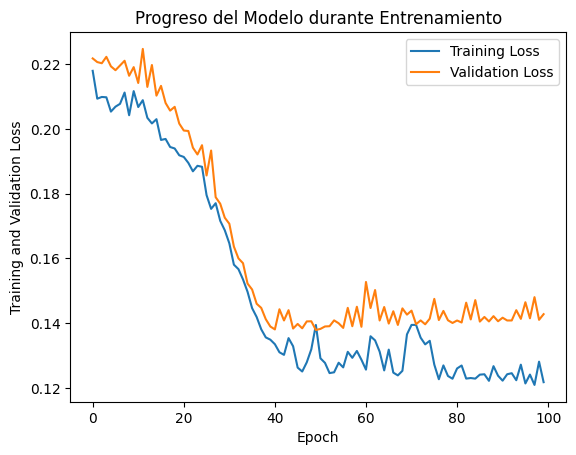

In [ ]:
#Grafico
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Progreso del Modelo durante Entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])